<h1><center> Dimension Reduction</center></h1>

<h2><center>PCA (Iris & MNIST)</center></h2>
   
<h3>References</h3>

1 .https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


<h3>Introduction to PCA </h3>

A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). If a learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. Another common application of PCA is for data visualization.

To understand the value of using PCA for data visualization, the first part of this tutorial post goes over a basic visualization of the IRIS dataset after applying PCA. The second part uses PCA to speed up a machine learning algorithm (logistic regression) on the MNIST dataset.



<h2> Math </h2>

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. 


This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. 


The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

<h2> Details </h2>

PCA is mathematically defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

Consider a data matrix, $X_{np}$, with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), where each of the $n$ rows represents a different repetition of the experiment, and each of the $p$ columns gives a particular kind of feature (say, the results from a particular sensor).

Mathematically, the transformation is defined by a set of $p$-dimensional vectors of weights or coefficients ${w}_{(k)}=(w_{1},\dots ,w_{p})_{(k)}$ that map each row vector ${x}_{(i)}$ of $X$ to a new vector of principal component scores ${t}_{(i)}=(t_{1},\dots ,t_{l})_{(i)}$, given by

$$
t_{{k}{(i)}}={x}_{(i)}\cdot {w}_{(k)}\qquad \mathrm{for} \qquad i=1,\dots ,n\qquad k=1,\dots ,l,
$$

in such a way that the individual variables $t_{1},\dots ,t_{l}$ of $t$ considered over the data set successively inherit the maximum possible variance from $X$, with each coefficient vector $w$ constrained to be a unit vector (where $l$ is usually selected to be less than $p$ to reduce dimensionality).

<h3> First Component </h3>

It can be shown that the first componet $t_1(i) = x_{(i)} \cdot w_{(1)} $ is obtained if $w_{(1)}$ is the first normalized eigenvector of $X^TX$, that is, the normalized eigenvector asociate to the first(the largest) eigenvalue of $X^TX$.

<h3> The remaining componentes </h3>

In general the $k$-th component is $t_1(i) = x_{(i)} \cdot w_{(k)} $ is obtained if $w_{(k)}$ is the $k$-th normalized eigenvector of $X^TX$.
 
<h3>Whitening or sphering transformation</h3>

The full principal components decomposition of $X$ can therefore be given as

$$
T = X W, 
$$

where $W$ is the matrix whose $k$-th column is $w_{(k)}$.

<h3> Dimension reduction: Codec </h3>

$$
T_L = X W_L, 
$$

$T_L$and $W_L$ are obtained from $T$ and $W$ respectively, preserving the first $L$ columns.


<h2>PCA for Data Visualization</h2>

For a lot of machine learning applications it helps to be able to visualize your data. Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset used in this part of the tutorial is 4 dimensional. You can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

<h4>Load Iris Dataset</h4>

The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the iris dataset.

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

<h4>Standardize the Datat</h4>

PCA is effected by scale so it is necessary to scale the features in the data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

In [23]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

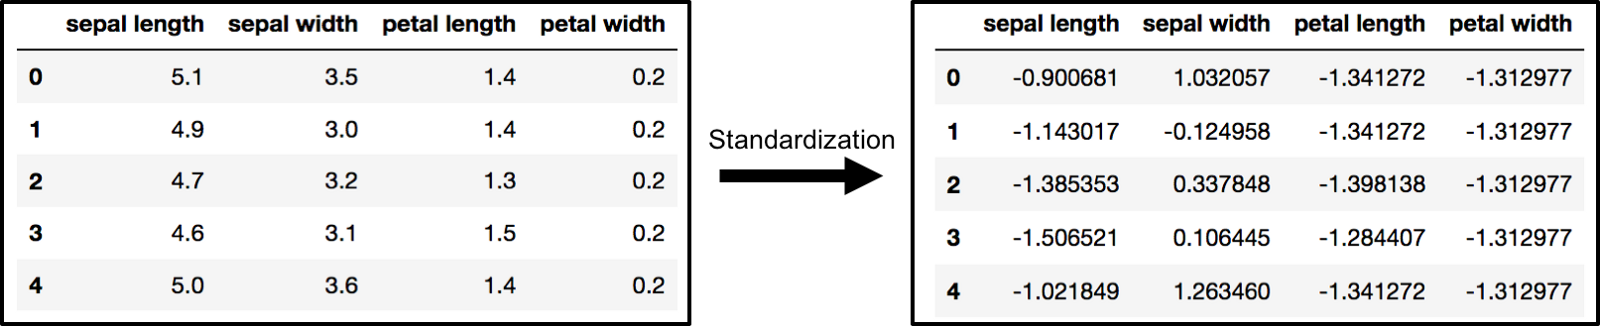

In [24]:
from IPython.display import Image
Image(filename="D:/home/Machine Learning Course/images/iris_standard.png")

<h4>PCA Projection to 2D</h4>
The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

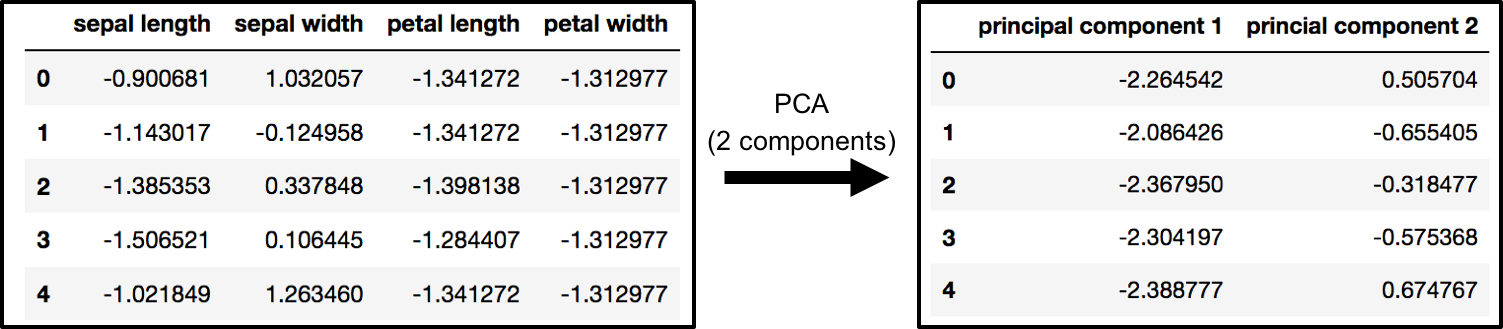

In [27]:
from IPython.display import Image
Image(filename="D:/home/Machine Learning Course/images/iris_2d_reduction_table.png")

<h4>Concat the Principal Components with Target</h4>

This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

In [30]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


<h4>Visualize 2D Projection</h4>

This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

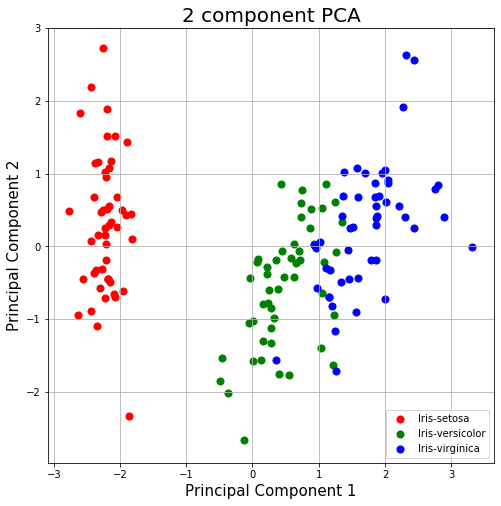

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<h4>Explained Variance</h4>

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [32]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

<h2>PCA to Speed-up Machine Learning Algorithms</h2>

One of the most important applications of PCA is for speeding up machine learning algorithms. Using the IRIS dataset would be impractical here as the dataset only has 150 rows and only 4 feature columns. The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.


<h3>Introduction to MNINST </h3>

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

The MNIST database of handwritten digits is available on the following website: http://yann.lecun.com/exdb/mnist/

In this lecture we use the data from tensorflow library

|Parameters | Number|
    |--- | ---|
    |Classes | 10|
    |Samples per class | ~7000 samples per class|
    |Samples total | 70000|
     |Training Samples | 60000|
      |Test Samples | 10000|
    |Dimensionality | 784 $(28 \times 28)$|
    |Features | integers values from 0 to 255|
 


Download and Load the Data
You can also add a data_home parameter to fetch_mldata to change where you download the data.

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

# train data
X_train = mnist.train.images
y_train = mnist.train.labels

# test data
X_test = mnist.test.images
y_test = mnist.test.labels

# validation data (not used here)
X_validation = mnist.validation.images
y_validation = mnist.validation.labels


W0924 16:19:27.118329  3904 deprecation.py:323] From <ipython-input-1-5c38de3b6274>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0924 16:19:27.159340  3904 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\m_learning\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0924 16:19:27.162341  3904 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\m_learning\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
I

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0924 16:19:28.567030  3904 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\m_learning\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting

W0924 16:19:28.775368  3904 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\m_learning\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


 MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
#help(mnist)

In [2]:
import numpy as np
print(np.shape(X_train),'\n', np.shape(X_test),'\n',np.shape(X_validation))

(55000, 784) 
 (10000, 784) 
 (5000, 784)


<h3>Standardize the Data </h3>

The text in this paragraph is almost an exact copy of what was written earlier. PCA is effected by scale so you need to scale the features in the data before applying PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train) # compute the prameters of the transformation (mean and std for each column of X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
# Apply transform to both the training set and the test set.
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_test)

<h3>Import and Apply PCA </h3>

Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.


In [10]:
# Make an instance of the Model
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)

Note: You can find out how many components PCA choose after fitting the model using pca.n_components_ . In this case, 95% of the variance amounts to 330 principal components.

In [11]:
pca.fit(train_img)
pca.n_components_

330

Apply the mapping (transform) to both the training set and the test set.

In [81]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

The previous code will both reduce the size of the mnist database and rebuild it in its original dimension. We can now plot the data in small size.

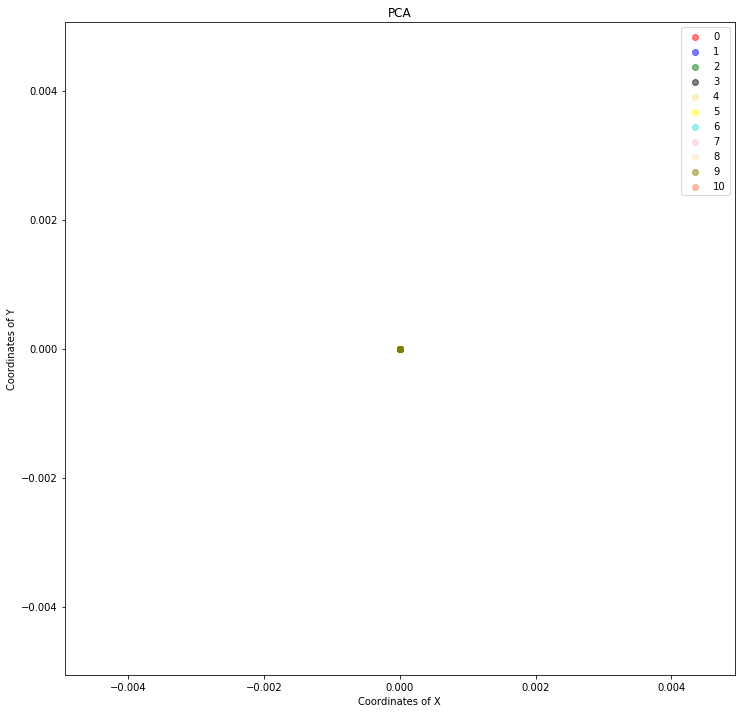

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

plt.scatter(train_img[y_train==0, 0], train_img[y_train==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(train_img[y_train==1, 0], train_img[y_train==1, 1], color='blue', alpha=0.5,label='1')
plt.scatter(train_img[y_train==2, 0], train_img[y_train==2, 1], color='green', alpha=0.5,label='2')
plt.scatter(train_img[y_train==3, 0], train_img[y_train==3, 1], color='black', alpha=0.5,label='3')
plt.scatter(train_img[y_train==4, 0], train_img[y_train==4, 1], color='khaki', alpha=0.5,label='4')
plt.scatter(train_img[y_train==5, 0], train_img[y_train==5, 1], color='yellow', alpha=0.5,label='5')
plt.scatter(train_img[y_train==6, 0], train_img[y_train==6, 1], color='turquoise', alpha=0.5,label='6')
plt.scatter(train_img[y_train==7, 0], train_img[y_train==7, 1], color='pink', alpha=0.5,label='7')
plt.scatter(train_img[y_train==8, 0], train_img[y_train==8, 1], color='moccasin', alpha=0.5,label='8')
plt.scatter(train_img[y_train==9, 0], train_img[y_train==9, 1], color='olive', alpha=0.5,label='9')
plt.scatter(train_img[y_train==10, 0], train_img[y_train==10, 1], color='coral', alpha=0.5,label='10')
plt.title("PCA"),
plt.ylabel('Coordinates of Y')
plt.xlabel('Coordinates of X')
plt.legend()
plt.show()

<h3>Apply Logistic Regression to the Transformed Data </h3>

1.  Import the model you want to use
In sklearn, all machine learning models are implemented as Python classes    

In [13]:
from sklearn.linear_model import LogisticRegression

2. Make an instance of the Model.

In [14]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

3. Training the model on the data, storing the information learned from the data
Model is learning the relationship between digits and labels

In [15]:
logisticRegr.fit(train_img, y_train)

C:\ProgramData\Anaconda3\envs\m_learning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\envs\m_learning\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\m_learning\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\m_learning\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\m_learning\lib\site-packages\sklearn\linear_model\logistic.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# Predict for Multiple Observations (images) at Once
pred = logisticRegr.predict(test_img[0:10])
pred

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [17]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [18]:
score = logisticRegr.score(test_img, y_test)
print(score)

0.9174


[0 1 2 3 4 5 6 7 8 9]


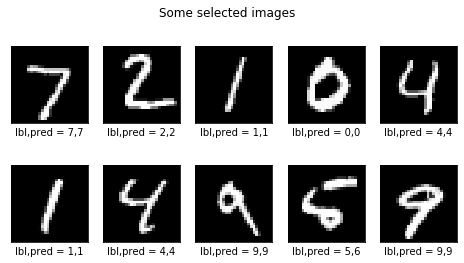

In [39]:
# select the images
import numpy as np

Nr =2
Nc = 5
id = np.arange(0,10,1)
print (id)


# Create subplots and hide ticks
import matplotlib.pyplot as plt

fig, axs = plt.subplots(Nr, Nc,sharex=True, sharey=True, figsize=(8,4))
for ax in axs.flat:
        ax.set(xticks=[], yticks=[])

fig.suptitle('Some selected images')
k=0
images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        data = X_test[id[k]]
        lbl = str(y_test[id[k]])
        predi = str(pred[k])
        images.append(axs[i, j].imshow(data.reshape((28, 28)), cmap='gray'))
        axs[i, j].label_outer()
        k= k+1
        axs[i,j].set_xlabel('lbl,pred = ' + lbl +',' + predi)
        
plt.show()

<h2> The reduction revisited </h2>

In this part we do not use the scaling to review the pure dimension reduction


In [40]:
# instance of PCA
pca = PCA(.95)

# Reduce the dimensionality of training data
lower_dimensional_data = pca.fit_transform(X_train)

In [41]:
pca.n_components_

154

The idea with going from 784 components to 154 (codec) is to reduce the running time of a supervised learning algorithm (in this case logistic regression).  One of the cool things about PCA is that we can go from a compressed representation (154 components) back to an approximation of the original high dimensional data (784 components): decodec.

In [42]:
approximation = pca.inverse_transform(lower_dimensional_data)

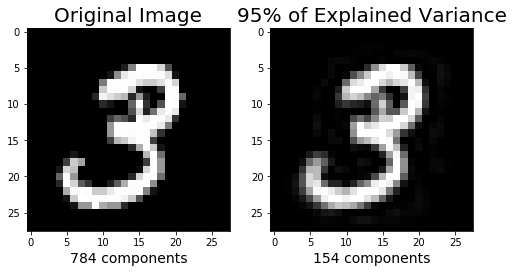

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X_train[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

<h2>Showing Graph of Explained Variance vs Number of Principal Components</h2>

In [52]:
# if n_components is not set all components are kept (784 in this case)
pca = PCA()

In [53]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
pca.n_components_

784

In [55]:
# Summing explained variance
tot = sum(pca.explained_variance_)
tot

52.73052303847711

In [56]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.695171613127943, 7.0741364287361215, 6.1759475389112435, 5.395143706359594, 4.881954274749739]


In [57]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

Plot can help you understand the level of redundancy present in multiple dimensions.

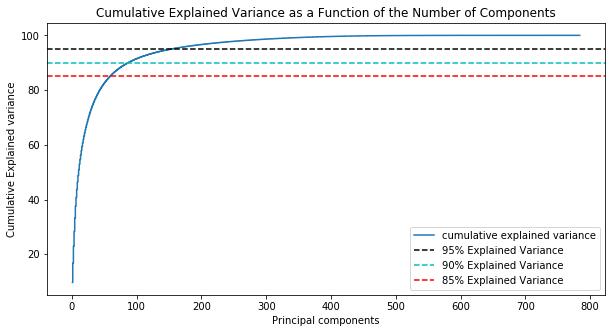

In [58]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

Number of Principal Components for 99%, 95%, 90%, and 85% of Explained Variance

In [59]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [60]:
componentsVariance 

[784, 331, 154, 87, 59]

In [61]:
from sklearn.decomposition import PCA

# This is an extremely inefficient function. Will get to why in a later tutorial
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

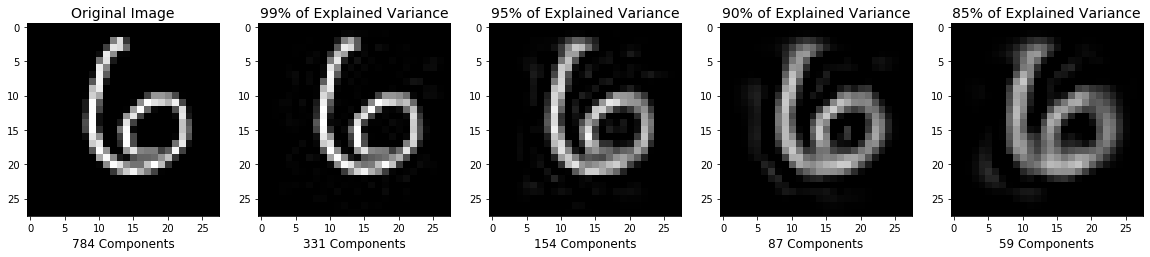

In [65]:
plt.figure(figsize=(20,4));

selected = 100
# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(X_test[selected].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99,X_test)[selected].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95,X_test)[selected].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, X_test)[selected].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, X_test)[selected].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);
